## "your_off-facebook_activity" Report grade analysis
Having graded all the submissions for the "your_off-facebook_activity" Report assignment, a decision needs to be made.
1. How did the class do on this second assignment?
2. Are there any concerns present in the data?
3. Is some action needed (like an assignment correction)?
4. Did the class do better or worse on this assignment than the last one?

For this analysis, the assignment scores from the first and second assignment were downloaded from Blackboard. The first assignment scores included resubmissions and corrections. The student information was stripped from the data using Excel and replaced with a random ID number. The scores were then randomized in Excel. This means that the normally-alphabetical data now has no association with student names or Kent State ID number.

### Analysis Plan
To analyze the data, the assignment scores will be loaded into the working environment and converted to a two-column DataFrame object. The univariate distributions will be assessed by plotting a histogram. Outliers will be assessed and descriptive statistics (mean, median, standard deviation) will be calculated before and after any outliers are removed. In addition, a probability plot will show how well the grades match a normal distribution. Finally, a pair-sample t-test will be used to determine if the scores differed significantly between the two assignments.

### Setting up the Environment
The following libraries will be used:
- scipy.stats
- pandas
- matplotlib.pyplot

In [42]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt

The grade data was exported as a CSV from Blackboard. The pandas library provides the `read_csv()` function to load CSV data as a DataFrame.

In [43]:
filepath = r'D:\EMAT_22110\EMAT22110\two-assignment_grades.csv'
t_grades = pd.read_csv(filepath)
print(len(t_grades))
t_grades.head()

23


,likes,fb_activity,id
0,145,121.000,150782
1,141,137.000,200123
2,147,150.000,334680
3,143,137.985,363412
4,141,150.000,511258


### Univariate Distribution
The distribution of the grades is plotted using pyplot's `hist()` function.

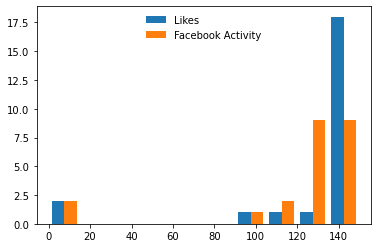

In [44]:
fig, ax0 = plt.subplots()
ax0.hist([t_grades['likes'], t_grades['fb_activity']], label = ["Likes", "Facebook Activity"])
ax0.legend(frameon = False, loc = 'upper center')
plt.show()

The maximum points possible for this assignment was 150. We can see two clear outliers at 0. After going back to Blackboard these two 0s are accurate, but fall well outside the norm for the class. In the analysis from the last assignment, it was found that the zeros can be removed without impacting the quality of the decisions made. So, a second DataFrame was created by removing the rows with zeros.

In [45]:
t_grades_no_zeros = t_grades.loc[t_grades['fb_activity'] > 0]
print(len(t_grades_no_zeros))
t_grades_no_zeros.head()

21


,likes,fb_activity,id
0,145,121.000,150782
1,141,137.000,200123
2,147,150.000,334680
3,143,137.985,363412
4,141,150.000,511258


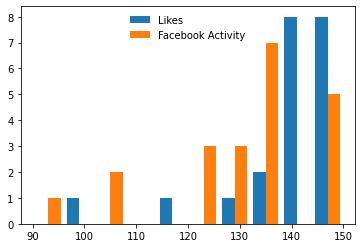

In [46]:
fig, ax1 = plt.subplots()
ax1.hist([t_grades_no_zeros['likes'], t_grades_no_zeros['fb_activity']], label = ["Likes", "Facebook Activity"])
ax1.legend(frameon = False, loc = 'upper center')
plt.show()

### Descriptive Statistics
From scipy.stats, the `describe()` function provides the mean, standard deviation, minimum and maximum values, and measures of normality. Also from scipy.stats, `mode()` calculates the mode. The `probplot()` function shows the data against an ideal normal distribution. If the observed values (the blue dots) fit closely with the theoretical probability line (in red), then the data matches a normal distribution. Deviations from the probability line show how the data is different from normal.
We will compute these for both the full data and for the data without the zero values.

`describe()` returns a DescribeResult object, from which we can call the specific stats of interest.

#### Description of the data without zeros
The number of observations is:

In [47]:
stats.describe(t_grades_no_zeros['fb_activity']).nobs

21

The mean is:

In [48]:
stats.describe(t_grades_no_zeros['fb_activity']).mean

130.5227380952381

The variance is:

In [49]:
stats.describe(t_grades_no_zeros['fb_activity']).variance

245.93360744047627

The minimum and maximum values are:

In [50]:
stats.describe(t_grades_no_zeros['fb_activity']).minmax

(90.0, 150.0)

The mode is:

In [51]:
stats.mode(t_grades_no_zeros['fb_activity']).mode[0]

150.0

The quantile ranges are:

In [52]:
stats.mstats.mquantiles(t_grades_no_zeros['fb_activity'])

array([124.4   , 132.    , 140.0895])

Plotting the probability of the scores still shows large deviations from a normal distribution, especially at the lower tail. However, it is closer to normal.

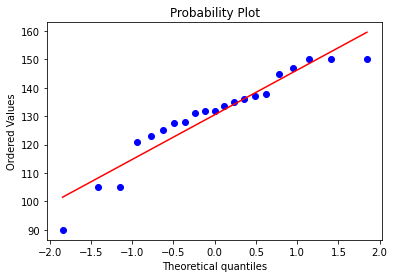

In [53]:
ax2 = plt.subplot()
res = stats.probplot(t_grades_no_zeros['fb_activity'], plot = plt)
plt.show()

### Conclusions
The average percentage with the zeros removed from the data is a respectable 87%. This is actually a little above my set goal of a B average in assignments by 2%.

In [54]:
stats.describe(t_grades_no_zeros['fb_activity']).mean/150*100

87.01515873015873

Surprisingly, we see that the the most frequent score (the mode) is a perfect 100% on the assignment! In this case, the mean and the mode give us different ideas about how best to summarize the performance of the class? Is it more descriptive to say that the class average was as B+ or to say that the most common score was a 100%?

In [55]:
stats.mode(t_grades_no_zeros['fb_activity']).mode[0]/150*100

100.0

#### What about change in grades?
The average and mode for this assignment were higher than for the "likes" Report, but did the class do consistently better on this assignment than the last assignment? This is exactly what a Paired Sample t-test can tell us.

Previously, we talked about an independent t-test, which compares two distributions against each other. This approach assumes independence of the values.

When we compare the scores for the same group of students between two assignments, our data is NOT independent. Because the you who turned in the "likes" Report is very much related to the you that turned in the "off-Facebook activity" Report, we have violated the assumption of independence. The data from both assignments is dependent on the person who did the assignments. This is also sometimes called a repeated measure. 

Thankfully, the Paired Sample t-test (which is what `stats.ttest_rel()` conducts) was built to correct for this violated assumption by evaluating the data in two steps. First, a Paired Sample t-test quantifies how much of the two values are similar _within_ a single person's two scores. That takes care of the dependence portion. Then something like a normal t-test is conducted that looks at the differences _between_ different people's scores.

The [`ttest_rel()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) function accepts two arrays that are the same shape. It's assumed that the indexes are the same for each individual in the data. For example individual A's scores are at index 0 in both arrays, and individual B's scores are in index 1, etc.

Let's compare the results between an independent t-test, which is incorrect, and a Paired Sample t-test, which is correct.

##### Independent t-test

In [56]:
stats.ttest_ind(t_grades_no_zeros['likes'], t_grades_no_zeros['fb_activity'])

Ttest_indResult(statistic=1.8869118482116014, pvalue=0.06644487518701359)

##### Paired Sample t-test

In [57]:
stats.ttest_rel(t_grades_no_zeros['likes'], t_grades_no_zeros['fb_activity'])

Ttest_relResult(statistic=2.1931574224094335, pvalue=0.040286059343552075)

What is similar, what is different, and how can we interpret these results?

In [58]:
stats.describe(t_grades_no_zeros['likes']).mean

138.57142857142858

In [59]:
stats.describe(t_grades_no_zeros['fb_activity']).mean

130.5227380952381

This tells us that the __after-corrections__ scores for the "likes" Report were significantly higher than the __before-correction__ grades for the "off-Facebook Activity" Report grades. That is true for the average of the class, but most importantly, is true when we take into account the dependent nature of the data. For most people, they earned a slightly lower score this time than last time.

In [60]:
t_grades_no_zeros['Change in Grade'] = t_grades_no_zeros.fb_activity - t_grades_no_zeros.likes
t_grades_no_zeros

<ipython-input-60-88fd852c235b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_grades_no_zeros['Change in Grade'] = t_grades_no_zeros.fb_activity - t_grades_no_zeros.likes


,likes,fb_activity,id,Change in Grade
0,145,121.0000,150782,-24.0000
1,141,137.0000,200123,-4.0000
2,147,150.0000,334680,3.0000
3,143,137.9850,363412,-5.0150
4,141,150.0000,511258,9.0000
7,100,105.0000,585357,5.0000
8,146,133.4850,618191,-12.5150
9,114,150.0000,656423,36.0000
10,145,131.0000,675426,-14.0000
11,138,135.0000,690806,-3.0000


__The same solution__: This assignment was more demanding than the last one, but you also have had more training. To me, the solution from last time worked well. Those who wanted to improve their scores were able to do so, boosting the overall class average. I have no problem with doing that again.

So, students can submit a corrected version of the assignment to earn back half credit of the points they missed. The deadline for corrections will be:<br />
__9:00 am ET March 16.__

For me, this is a fair solution. It still requires more work for those who did not do well on the first assignment. Those with less to fix can earn back some points with minimal effort. And those who already earned an A on the assignment can focus on other things.